# Topic Modeling

In [25]:
import Topic_modeling

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,30)

import pandas as pd
import numpy as np

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer

OMP_NUM_THREADS=1

In [2]:
everything = Topic_modeling.Topic_modeling('Excels/everything.xls', 'everything')
adv_disav_def = Topic_modeling.Topic_modeling('Excels/adv_disav_def.xls', 'adv_disav_def')
ansible = Topic_modeling.Topic_modeling('Excels/ansible.xls', 'ansible')
bad_practices = Topic_modeling.Topic_modeling('Excels/bad_practices.xls', 'bad_practices')
best_practices = Topic_modeling.Topic_modeling('Excels/best_practices.xls', 'best_practices')
chef = Topic_modeling.Topic_modeling('Excels/chef.xls', 'chef')
puppet = Topic_modeling.Topic_modeling('Excels/puppet.xls', 'puppet')

In [16]:
puppet.modeling(num_topics = 16)

In [17]:
puppet.save_html_lda()

C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Topological Analysis

### Creating word2vec model and transform the words into vectors + PCA + TSNE

In [26]:
data = [everything.data_lemmatized, adv_disav_def.data_lemmatized,ansible.data_lemmatized,
        bad_practices.data_lemmatized,best_practices.data_lemmatized,chef.data_lemmatized,
        puppet.data_lemmatized]
data_name = ['everything', 'adv_disav_def','ansible','bad_practices','best_practices','chef','puppet']
min_count = [10,30]
# Optimal between 5-50
# http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
perplexity = [5,30,50]
for data_idx in range(len(data)):
    for c in min_count:
        # Selective model, minimum number of times a word appears = min_count
        model = Word2Vec(data[data_idx], min_count=c)
        X = model[model.wv.vocab]

        # Creating PCA with 2 components and exporting the plot figure
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)

        plt.scatter(result[:, 0], result[:, 1])
        words = list(model.wv.vocab)
        for i, word in enumerate(words):
            plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        plt.savefig('PCA_{}_{}.png'.format(data_name[data_idx],c), format='png')
        plt.close()
        # Creating TSNE with 2 components and different perplexity
        for p in perplexity:
            tsne = TSNE(n_components=2, perplexity=5)
            result = tsne.fit_transform(X)
            plt.scatter(result[:, 0], result[:, 1])
            words = list(model.wv.vocab)
            for i, word in enumerate(words):
                plt.annotate(word, xy=(result[i, 0], result[i, 1]))
            plt.savefig('TSNE_{}_{}_{}.png'.format(data_name[data_idx],c, p), format='png')
            plt.close()

C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be

#### 3D Visualization of word2vec using TSNE

In [17]:
model = Word2Vec(data, min_count=20)
X = model[model.wv.vocab]
tsne = TSNE(n_components=3, perplexity=30)
result = tsne.fit_transform(X)

C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


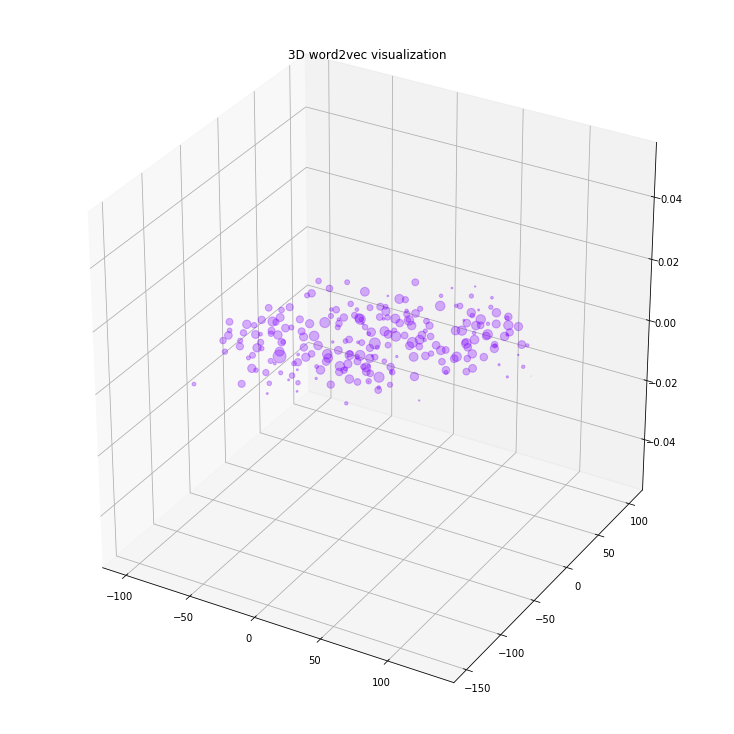

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
colors = cm.rainbow(np.linspace(0, 1, 1))
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(result[:, 0], result[:, 1], result[:, 2], c=colors, alpha=0.3)
plt.title('3D word2vec visualization')
plt.show()

### Using kmapper to create a 2D topology based on the word2vec extraction

#### On word2vec

In [66]:
# Import the class
import kmapper as km
from sklearn import cluster

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.33)

# Visualize it
mapper.visualize(graph, path_html="Visualizations/word2vec_top_analysis.html", X =X, X_names = words,
                 title="Topological analysis word2vec");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1729, 100)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (1729, 100) using lens shaped (1729, 2)

Creating 100 hypercubes.

Created 969 edges and 177 nodes in 0:00:00.123663.
Wrote visualization to: Visualizations/word2vec_top_analysis.html
